# Part I

1) Import Necessary Libraries
The first thing you have to do is to import necessary modules.


In [108]:
# data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [109]:
train = pd.read_csv("E:/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Analysis

We will try to observe some key insights of the data


In [110]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [111]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C


Question: What is the difference between .head() and .sample() function ? Hint: Check Pandas Documentation

.head(): This function returns the first n rows for the object based on position.
.sample(): This function returns a random sample of items from an axis of object.

In [113]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- **Numerical Features**: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- **Categorical Features**: Survived, Sex, Embarked, Pclass
- **Alphanumeric Features**: Ticket, Cabin

Now that we have an idea of what kinds of features we're working with. Lets find out how much information we can get from those features.

In [114]:
"""To get an statitical analysis for each column, python has a function called describe. It provides the unique values,
mean, minimum and maximum values, standard deviation and so on"""
#see a summary of the training dataset
train.describe(include = "all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


There are a total of 891 passengers in the training set.

Question: There are a total of 714 values for Age feature in the training set. What is the percentage of missing values in Age column?



In [115]:
# Checking the total number of passengers
total_passengers = train.shape[0]
print("Total number of passengers in the training set:", total_passengers)


Total number of passengers in the training set: 891


In [116]:
#Percentage of missing values
missing_cabin_count = train['Cabin'].isnull().sum()
percentage_missing_cabin = (missing_cabin_count / total_passengers) * 100
print("Percentage of missing values in the Cabin feature:", percentage_missing_cabin)


Percentage of missing values in the Cabin feature: 77.10437710437711


Age feature is pretty important to survival, so we should probably attempt to fill these gaps.

Question: What is the percentage of missing values in the Cabin feature.


In [117]:
#Percentage of missing values
missing_cabin_count = train['Cabin'].isnull().sum()
percentage_missing_cabin = (missing_cabin_count / total_passengers) * 100
print("Percentage of missing values in the Cabin feature:", percentage_missing_cabin)

Percentage of missing values in the Cabin feature: 77.10437710437711


In [118]:

"""We can also check total how many values are missing for each feature"""
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Few Hypothesis (Initial Assumption):

- Sex: Females are more likely to survive.
- Pclass: People of higher socioeconomic class are more likely to survive.
- SibSp/Parch: People traveling alone are more likely to survive.
- Age: Young people are more likely to survive.

**4) Data Visualization**

To see if our hypothesis is correct or not, we have to visualize the data

**Sex Feature**

Let's plot a bar graph to get it

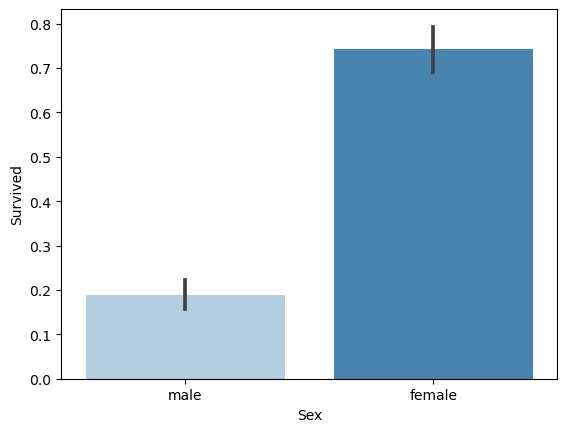

In [119]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train, palette = "Blues")
plt.show()


The plot clearly shows that females are more likely to survive than men. All in all, the initial obsrervation was correct.

**Pclass Feature**

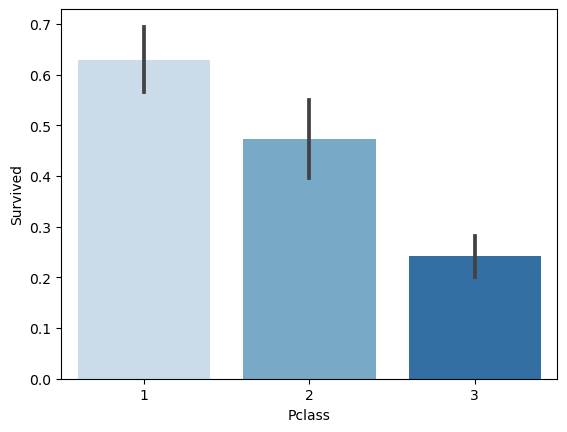

In [120]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train, palette = "Blues")
plt.show()

The bar graph is in descending order which shows that people of the highest class(1) have higher chances of survival compared to lower classes(2 & 3). All in all, the initial obsrervation was correct.

**SibSp Feature**

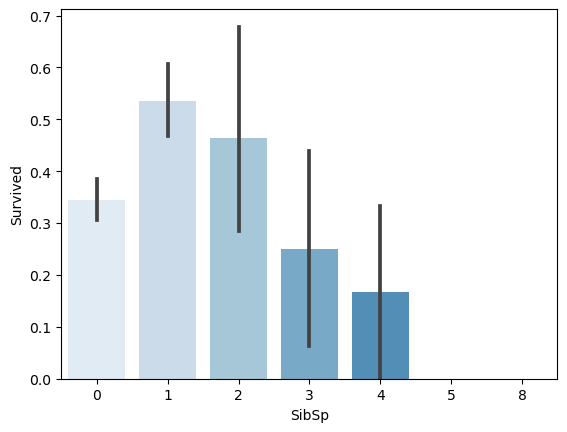

In [121]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train, palette = "Blues")
plt.show()

No, the initial observation wasn't correct as the graph shows that people travelling with 1 other person have higher chances of surviving. In fact, people travelling alone have lower chances than people travelling alongside two other people.

**Parch Feature**

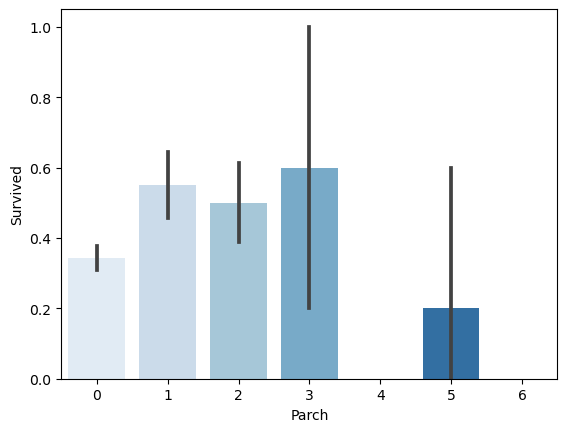

In [122]:
#draw a bar plot for Parch vs. survival (Parch means having parents or children)
sns.barplot(x="Parch", y="Survived", data=train, palette = "Blues") # you can play with parameters to visualize more nicely. 
plt.show()


Once again, the initial observation wasn't correct as the graph shows that people travelling with 1 other person and 3 other person have higher chances of surviving than alone travellers

**Age Feature**

Let's firstly put some data in empty data space for age column. Let's append -0.5

In [123]:

#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
#fill the missing values with -0.5 and defining them unknown. As we don't know from which Age group they belong.

In [124]:
train["Age"].isnull().sum()

0

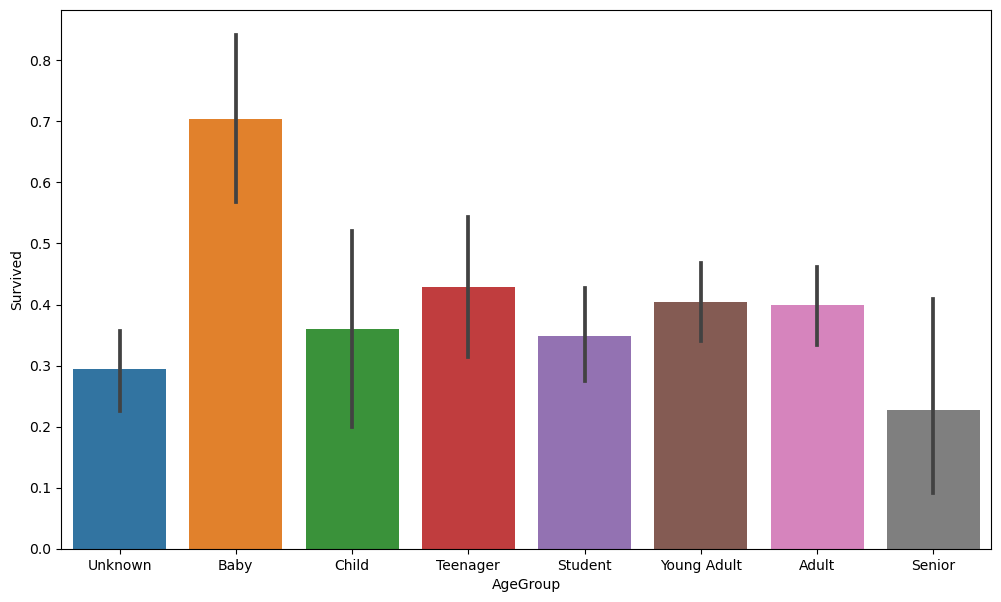

In [125]:
# In order to make viewers know the actual age class, let's convert particular bins to particular alphabetical notations and then plot the necessary graph

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels) # Adding a feature named AgeGroup.
#draw a bar plot of Age vs. survival
plt.figure(figsize=(12,7))
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()


Compared to older groups of people, younger people have higher tendency to live which is correct comparing the graphs of older people

**5) Cleaning Data**

It's time to clean the missing values and unnecessary information!

Outliers can affect the performance of the predictive model. Moreover, unnecessary data makes the model more complex and ends up making a bad predictive model. Thus, we will drop unnecessary columns and fill the missing values that are important.

Since, there are alot of values in cabin feature and it is unneccesary for the chances of survval. We can drop the column.
Similarly, cabin is also uneccesary. Let's drop it as well.

In [126]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)

In [127]:

#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)


In [128]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.4500,S,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Young Adult


The two columns namely Ticket and Cabin have been dropped. Now, let's move towards data analysis

**Embarked Feature**

Embarked feature represents from where the passengers got on board which may be useful in the future. Here 'S' represents Southampton, 'C' is Cherbourg and 'Q' is Queenstown. This can be a potential feature and thus, instead of dropping, we will keep the feature and fill up the missing values.

In [129]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)
print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)
print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


The analysis clearly shows that the people embarked at Southampton is a lot more compared to others.

Hence, it is a good practice to fill in the missing values with the most occurances when the number of missing values are few. But it differs depending on the situation. So, lets replace the missing embarked values with "S"

We can also do it by putting mean values but in this dataset, there is a huge amount of fluctuation in respecctive datas so the approach we are using is better.


In [130]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

Now, null embarks contain S in them

**Age Feature**

A higher percentage of values are missing for the age feature. However, it would be illogical to fill all of them with the same value. Instead, we'll try to find a way to predict the missing ages.

In [131]:
#create a list to loop through all the values of the dataset
combine = [train]
"""First we will create another feature called Title and extract titles from the Name column. The following code snippet shows
how to extract or parse some portion of a string."""
#extract a title for each Name in the dataset
for dataset in combine:
 dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex']) #this is how we can see the number of people holding which titles

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [132]:
"As the unique values of the Title column are a bit larger than expected, we will replace those with more common terms."
#replace various titles with more common names
for dataset in combine:
 dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
 #in the above line we have replaced the tiles such as Lady, Capt, Col etc with Rare.
 #the following lines are doing the same for different titles
 
 dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
 dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
 dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
 dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
df = train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
df
#this line shows the mean percentage of survived people of different titles. 

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


**Question:** Did all the Royal titled passengers survive?

By initial observation, it clearly shows that all royal people survived. Let's cross-check it by visualizing the data

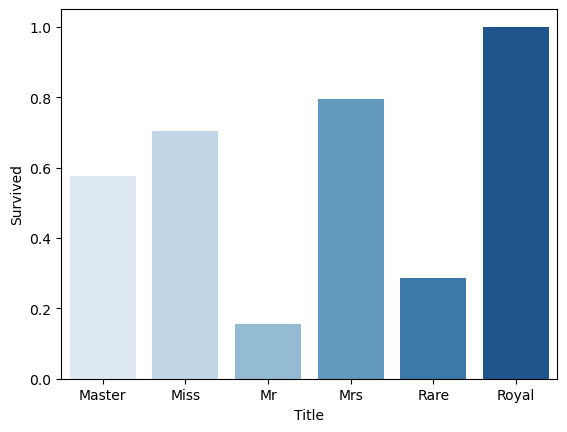

In [133]:
#draw a bar plot for Parch vs. survival (Parch means having parents or children)
sns.barplot(x="Title", y="Survived", data=df, palette = "Blues") # you can play with parameters to visualize more nicely. 
plt.show()

All in all, the graph shows that all royal people survived

In [134]:

"""As machine learning model understand numeric values, thus we need to define numerical values for categorical variables"""
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
 dataset['Title'] = dataset['Title'].map(title_mapping)
 dataset['Title'] = dataset['Title'].fillna(0)
#Here we have replaced all the title values with numerical values
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


Next, we'll try to predict the missing Age values from the most common age for their Title.

Now that, we have changed the titles with the numerical values, we can easily filter out age values with proper title and age group. Using only mean values to fill the age values is not a good idea.

Hence, we are filtering out the age groups with their titles and retrieveing the mode value. Mode
value means the value that appears often.


In [135]:

# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]


In [136]:
train["AgeGroup"]

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888        Student
889    Young Adult
890    Young Adult
Name: AgeGroup, Length: 891, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

Now that we've filled in the missing values at least somewhat accurately, it's time to map each age group to a numerical value.
As mentioned earlier, most of the machine learning models can deal with only numerical values. Therefore, we will now transform those categorical values into numerical values and remove the features that are not worthy.


In [137]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)

Segmenting people of different age groups and respresnting them in numerical data. Now le's look at new train dataset

In [138]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,1


Now, since we have used Name, we can drop Name

In [139]:

#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)

In [140]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,male,1,0,7.2500,S,4.0,1
1,2,1,1,female,1,0,71.2833,C,6.0,3
2,3,1,3,female,0,0,7.9250,S,5.0,2
3,4,1,1,female,1,0,53.1000,S,5.0,3
4,5,0,3,male,0,0,8.0500,S,5.0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,5.0,6
887,888,1,1,female,0,0,30.0000,S,4.0,2
888,889,0,3,female,1,2,23.4500,S,4.0,2
889,890,1,1,male,0,0,30.0000,C,5.0,1


**Sex Feature**

Now, let's map sex too in numerical form

In [141]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4.0,1
1,2,1,1,1,1,0,71.2833,C,6.0,3
2,3,1,3,1,0,0,7.9250,S,5.0,2
3,4,1,1,1,1,0,53.1000,S,5.0,3
4,5,0,3,0,0,0,8.0500,S,5.0,1


**Embarked Feature**

In [142]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

In [143]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4.0,1
1,2,1,1,1,1,0,71.2833,2,6.0,3
2,3,1,3,1,0,0,7.9250,1,5.0,2
3,4,1,1,1,1,0,53.1000,1,5.0,3
4,5,0,3,0,0,0,8.0500,1,5.0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,13.0000,1,5.0,6
887,888,1,1,1,0,0,30.0000,1,4.0,2
888,889,0,3,1,1,2,23.4500,1,4.0,2
889,890,1,1,0,0,0,30.0000,2,5.0,1


**Fare Feature**

Since, fair feature is unnecessary, we can drop it now.

In [144]:
# drop Fare values
train = train.drop(['Fare'], axis = 1)


In [145]:
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,1,4.0,1
1,2,1,1,1,1,0,2,6.0,3
2,3,1,3,1,0,0,1,5.0,2
3,4,1,1,1,1,0,1,5.0,3
4,5,0,3,0,0,0,1,5.0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,0,1,5.0,6
887,888,1,1,1,0,0,1,4.0,2
888,889,0,3,1,1,2,1,4.0,2
889,890,1,1,0,0,0,2,5.0,1


**Question**: What differences you are observing here from the initial dataset?

The major differences are that there aren't null data, categorical data and unnecessary data remaining in the current dataset. Now, we are ready to use models. 

**Question**: Write some other ways to change categorical variables into numerical ones? (Hint: Check scikit-learn preprocessing and encoding documentations)

- OrdinalEncoder 
- SimpleImputer
- OneHotEncoder

6) Choosing the Best Model

To construct a predictive model, we have to feed clean data to the model. Thats what we were doing in the above sections. Now, to train a model and measure the performance of the model, we will split the clean data into two parts. One part is called the training data by which we will train the model and the
other part is called the validation data by which we will measure the performance of the data. Conventionally, its better to preserve 80% of data for the training set and 20% for the validation set.

However, if you have a very large dataset such as 10 million observations, then its better to have 99% of training data and 1% of validation data. Because our target is to train the model with as much data as we can. And test the model with sufficient amount of validation data. 1% of 10 million is ten thousand data. Which is enough of validation purpose.

Splitting the Training Data

We will use split of our training data into training and validation set to test the accuracy of different models. Please check here to know more about the reason behind splitting the data


In [146]:
from sklearn.model_selection import train_test_split
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

**Testing Different Models**

Try to test the following models with the training data

Logistic Regression
Support Vector Machines
Decision Tree Classifier
Random Forest Classifier
KNN or k-Nearest Neighbors

For each model, set the model, fit it with 80% of the training data, predict for 20% of the training data and check the accuracy.

In [147]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression() #store the model into your own specified variable. Now logreg is a logistic regression model.
logreg.fit(x_train, y_train) #train the model with the training data.
y_pred = logreg.predict(x_val) #predict the value of the validation data
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2) #Compare the predicted value with the true value to get the accuracy.
print(acc_logreg)


77.65


Similarly we have done the same approach for all the other algorithms to see which algorithm suits better for our problem.
It is very hard to choose a single machine learning model instantly. It depends on the dataset and what you want to do with. Thus, it is a better practice to check different algorithms and finally select the best fitted one.

In [148]:

# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)


82.68


The accuracy has gone higher. 

In [149]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

78.21


So far, Vector Machines has worked better

In [150]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

78.77


Still, Vector Machines has worked the best.

In [151]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

83.24


Now, let's look at it in terms of Dataframe

In [157]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_randomforest, acc_decisiontree]
})

# Sorting the DataFrame by 'Score' column in descending order
models_sorted = models.sort_values(by='Score', ascending=False)

# Resetting the index
models_sorted.reset_index(drop=True, inplace=True)

models_sorted

,Model,Score
0,KNN,83.24
1,Support Vector Machines,82.68
2,Random Forest,78.77
3,Decision Tree,78.21
4,Logistic Regression,77.65


Finally, the highest accuracy is KNN. Hence, for the dataset, the model with highest accuracy(83.24) is KNN

Let's visualize to finalize it.

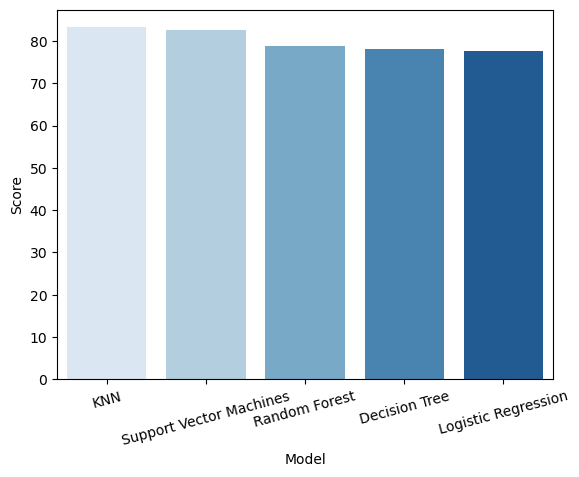

In [160]:
#draw a bar plot for Parch vs. survival (Parch means having parents or children)
sns.barplot(x="Model", y="Score", data=models_sorted, palette = "Blues") # you can play with parameters to visualize more nicely. 
plt.xticks(rotation=15)
plt.show()

Finally, we can say that KNN is better fit for prediction.